# _Python for Scientific Data Analysis_

# SciPy

SciPy stands for Scientific Python.  SciPy is a scientific computation library that you will see referenced profusely in physics and astronomy coding applications.   SciPy SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.  

 Originally, it was written using its own data type (a "Numeric").  But then everyone realized that this wasn't a good idea.  So now the basic data structure used by SciPy is a multidimensional array provided by the NumPy module (i.e. it uses NumPy underneath).   

While a lot of the linear algebra operations in SciPy are also found in NumPy, SciPy is especially good for optimization, statistics, and signal processing/filtering of various flavors.

## Section 1: Optimization in SciPy 


We have already discussed some of its linear algebra capabilities in the previous lectures, so we are going to switch gears slightly, first discussing its optimization capabilities.


The _optimization_ subpackage within Scipy can be accessed by ``from scipy import optimize``.   Nearly always you want to do array operations when setting up an optimization problem, in which case, you need to load NumPy as well.  So the typically preliminary steps for a SciPy optimization problem are to do the following at the beginning of your script:

```
import numpy as np
from scipy import optimize
```

### 1. Root Finding

#### _Motivation_

  The root or zero of a function, $f(x)$, is an $x_{r}$ such that the function evaluated at $x_{r}$ equals 0 ($f(x_{r})$ =0).   
  
  Finding the roots of functions is important in many engineering applications such as signal processing and optimization. For simple functions such as $f(x) = ax^{2} + bx + c$, you can analytically solve for roots using the _quadratic formula_:
  
  $x_{r}$ = -b $\pm$ $\frac{\sqrt{b^{2}-4ac}}{2a}$ .  
  
  This gives the two roots of $f$, $x_{r}$, exactly.

But what about if you have a cubic function? Or quartic? Or just a very complicated-looking one?  In that case, you need to appeal to numerical methods to find roots.  

We will start of discussing root finding with ``scipy.optimize``'s ``fsolve`` function.   ``fsolve`` is pretty complicated and we are going to treat it as a black box for now.   

Then we will discuss an important topic with any sort of optimization procedure -- tolerancing -- before going back to describing a few the wide array of optimization approaches (e.g. gradient descent; Newton-Raphson) and how these strategies are implemented in algorithms SciPy actually uses.
 

#### _Basic Root Finding with SciPy.Optimize's ``fsolve`` and ``root``_

Our first stop in the process if doing this is the aptly named ``fsolve`` function within ``scipy.optimize``.  As the documentation states "_fsolve is a wrapper around MINPACK's hybrd and hybrj algorithms_."  Here, MINPACK is a FORTRAN subroutine library for solving minimization problems which you may have heard about.   So as with NumPy, SciPy does a lot of things that are basically friendly wrappers of algorithms in faster, simpler languages.

The actual algorithm used with ``fsolve`` is a version of _Powell's Hybrid Method_ which is a combination of the Gauss-Newton algorithm (which is an extension of the Newton-Raphson method described below) and gradient descent (ditto).  If you are really interested in the details of this method you can read about it here: [https://en.wikipedia.org/wiki/Powell's\_dog\_leg\_method]() .  If you are _really really_ interested (I'm not) you can also read about the specific implementation within MINPACK here: [https://www.math.utah.edu/software/minpack/minpack/hybrj.html]() .  For everyone else (everyone?), we will just move on and describe what it does with a few examples.

Let's take one example of root finding with ``fsolve``.  Consider the function:

 $f(x) = 5*sin(x) - x^{3} + 2$ 
 
 Now, let's solve it with ``fsolve``.   Here, the key commmand is ``fsolve([function name],initial guess)``.   That is, you have to provide ``fsolve`` with a starting guess.  If there are multiple roots, this is akin to "find the nearest root to $x_{o}$".
 
 Anyway, let's proceed to set up our optimization problem...

In [65]:
import numpy as np 
from scipy import optimize

 
 #define our function as a lambda function
 
func=lambda x: 5*np.sin(x)-x**3.+2

Here, I've defined a lambda function _func_ which is a function of _x_. We then will plug in this single variable into ``fsolve`` to gain a solution given a starting guess.  Let's try a couple of initial guesses.  First, let's try at zero.  Now, we can easily figure out just from looking at the function, that 0 is not _actually_ a root (the first two entries go to zero, but the 2 remains).  But perhaps there is a solution close to it. 

In [66]:
 #see how simple this is to write? I told you that lambda functions would be useful somehow!

 result=optimize.fsolve(func,0)
 print(result)

[-0.42878611]


So, given an initial guess of 0, we find a root of about -0.429.  We can then verify that this is a root as follows:

In [67]:
func(result)
#note: you might see this as something like 1e-14 or so.  That's "zero to within machine precision"

array([0.])

So we get a number ~ 0.  Looks like ``fsolve`` found something that is quite close to a root of our ugly $f(x)$ function.
 
 Now, let's try a different initial guess ... how about 10 being a root?   You can probably guess it isn't (the $x^{3}$ term is going to tank this idea) but can SciPy find a root with this initial guess?  Yup!

In [68]:
result=optimize.fsolve(func,10)
 #array([1.88968729])
    
print(result)
 
func(result)
 #array([0.])

[1.88968729]


array([0.])

 In fact, by eye this looks like an _exact_ solution. 
 
 What about if we give it a negative value? 

In [69]:
 result=optimize.fsolve(func,-10)
 #array([-1.43481477])
 print(result)
 
 func(result)
 #array([2.03836947e-13])

[-1.43481477]


array([2.03836947e-13])

 
 So manually guessing solutions and getting the roots nearest to our guess is tedious.  And we would be tempted to vectorize this problem.  E.g.

In [70]:
#import numpy as np 
#from scipy import optimize
 
 #define our function as a lambda function
 
func=lambda x: 5*np.sin(x)-x**3.+2
evalnumbers=np.arange(-100,100,0.5)
result=optimize.fsolve(func,evalnumbers)
roots=np.unique(result.round(decimals=6))
print(roots)
#array([-1.434815, -0.428786,  1.889687])
func(roots)
#array([1.26732159e-06, 4.38162979e-07, 3.60173658e-06])

[-1.434815 -0.428786  1.889687]


array([1.26732159e-06, 4.38162979e-07, 3.60173658e-06])

But what this is literally telling ``optimize`` is that your initial guess is the array np.arange(-100,100,0.5), whereas the function is a function of just one variable.  Watch what happens when you decrease the spacing size:

In [71]:
#import numpy as np 
#from scipy import optimize
import warnings

func=lambda x: 5*np.sin(x)-x**3.+2
evalnumbers=np.arange(-100,100,0.2) #2.5x finer grid
result=optimize.fsolve(func,evalnumbers)

#RuntimeWarning: The iteration is not making good progress, as measured by the 
#  improvement from the last ten iterations.
#warnings.warn(msg, RuntimeWarning)

roots=np.unique(result.round(decimals=6))
roots
#giant array

/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_76123/1002811538.py:7: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  result=optimize.fsolve(func,evalnumbers)


array([-100. ,  -99.8,  -99.6,  -99.4,  -99.2,  -99. ,  -98.8,  -98.6,
        -98.4,  -98.2,  -98. ,  -97.8,  -97.6,  -97.4,  -97.2,  -97. ,
        -96.8,  -96.6,  -96.4,  -96.2,  -96. ,  -95.8,  -95.6,  -95.4,
        -95.2,  -95. ,  -94.8,  -94.6,  -94.4,  -94.2,  -94. ,  -93.8,
        -93.6,  -93.4,  -93.2,  -93. ,  -92.8,  -92.6,  -92.4,  -92.2,
        -92. ,  -91.8,  -91.6,  -91.4,  -91.2,  -91. ,  -90.8,  -90.6,
        -90.4,  -90.2,  -90. ,  -89.8,  -89.6,  -89.4,  -89.2,  -89. ,
        -88.8,  -88.6,  -88.4,  -88.2,  -88. ,  -87.8,  -87.6,  -87.4,
        -87.2,  -87. ,  -86.8,  -86.6,  -86.4,  -86.2,  -86. ,  -85.8,
        -85.6,  -85.4,  -85.2,  -85. ,  -84.8,  -84.6,  -84.4,  -84.2,
        -84. ,  -83.8,  -83.6,  -83.4,  -83.2,  -83. ,  -82.8,  -82.6,
        -82.4,  -82.2,  -82. ,  -81.8,  -81.6,  -81.4,  -81.2,  -81. ,
        -80.8,  -80.6,  -80.4,  -80.2,  -80. ,  -79.8,  -79.6,  -79.4,
        -79.2,  -79. ,  -78.8,  -78.6,  -78.4,  -78.2,  -78. ,  -77.8,
      

 First, Python tells you that the solution did not converge.  And the answer you get is very close to your initial guess in each case.  Not helpful.
 
 Now do the same in a for-loop:

In [72]:
func=lambda x: 5*np.sin(x)-x**3.+2
evalnumbers=np.arange(-100,100,0.5)

result=np.zeros(len(evalnumbers))
for ind,guess in enumerate(evalnumbers):
 result[ind]=optimize.fsolve(func,guess)
   
roots=np.unique(result.round(decimals=6))

roots

/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_76123/432102458.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[ind]=optimize.fsolve(func,guess)


array([-1.434815, -0.428786,  1.889687])

See, we recovered the original, suspected answer based off our our manual picking away at the problem.

Now, we can visualize the solutions using a plotting package like Matplotlib (don't worry about the syntax if you don't know it already: we will learn it later):

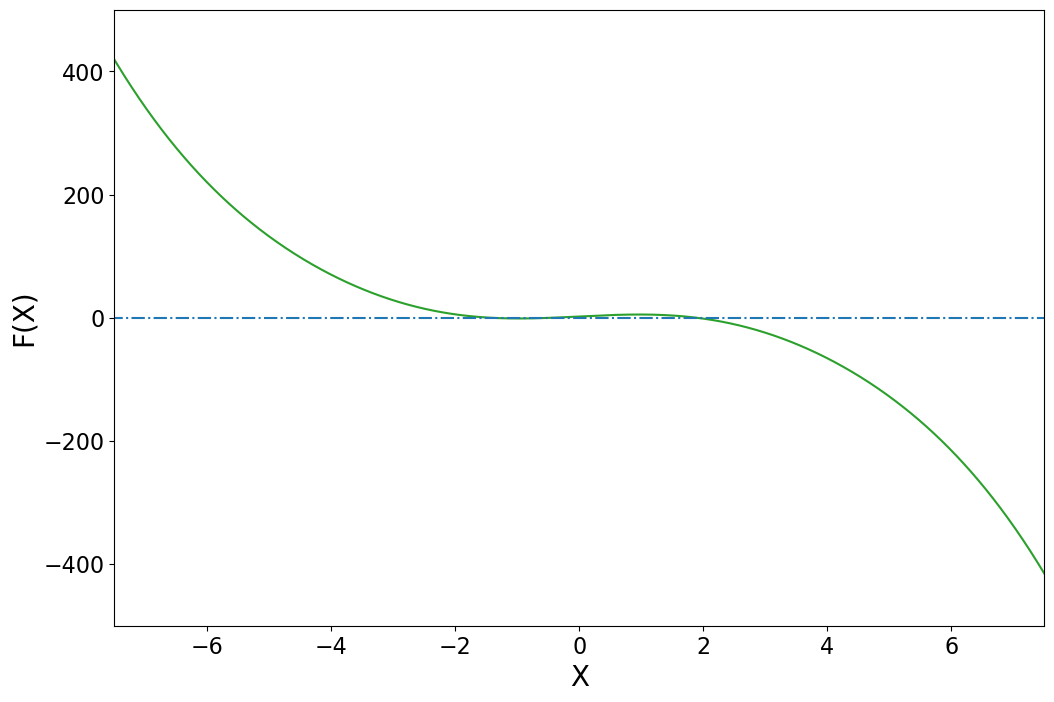

In [73]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8] #to make the figures larger in Jupyter

rangeofnumbers=np.linspace(-10,10,1000) #an array of x values where we evaluate the function "func"
plt.plot(rangeofnumbers,func(rangeofnumbers),c='tab:green')
plt.hlines(0,rangeofnumbers[0],np.max(rangeofnumbers),linestyles='-.')
plt.xlabel('X',fontsize=20)
plt.ylabel('F(X)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-500,500)
plt.xlim(-7.5,7.5)

plt.show()

Here, I've added a horizontal blue dash-dotted line.  It is clear that f(x) crosses 0 somewhere around -1.5 and 2.  Zooming in shows that it crosses near -0.4 as well.  There are no other zeros (er, 'roots') of this function.

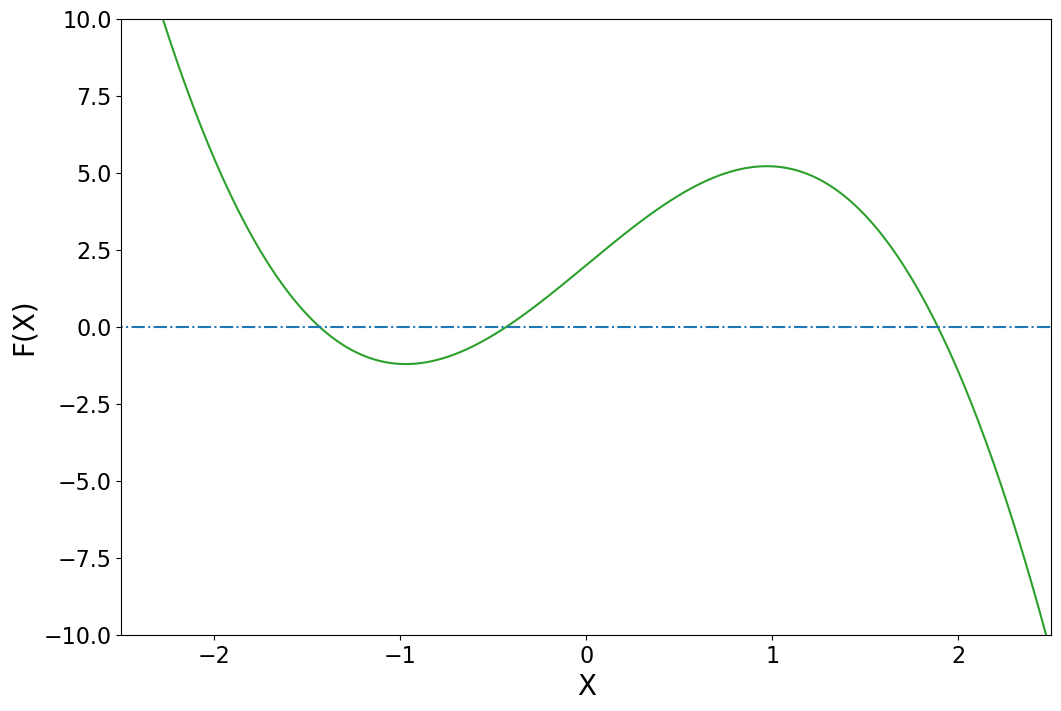

In [74]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8] #to make the figures larger in Jupyter

rangeofnumbers=np.linspace(-10,10,1000) #an array of x values where we evaluate the function "func"
plt.plot(rangeofnumbers,func(rangeofnumbers),c='tab:green')
plt.hlines(0,rangeofnumbers[0],np.max(rangeofnumbers),linestyles='-.')
plt.xlabel('X',fontsize=20)
plt.ylabel('F(X)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-2.5,2.5)
plt.ylim(-10,10)
plt.show()

#### _Basic Root Finding with SciPy.Optimize's ``root``_

Okay, ``fsolve`` is one root-finding example.  Another is aptly named ``root``.  We will briefly discuss the key features of ``root``: the full documentation is here
[https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html#scipy.optimize.root)]()

A major difference with ``root`` vs ``fsolve`` is that ``root`` offers you _multiple_ algorithms for root finding.   The default method is the modified Powell method which -- like ``fsolve`` -- uses MINPACK routines under the hood.   Some of the others are commonly used -- in fact you may have heard of them before.   

Describing what they actually do is instructive at this point.  But to avoid them becoming yet another black box, we need to describe basic concepts with root finding algorithms first.  Then we can discuss the algorithms actually used and discussing specific examples.    Note that these algorithms are often used in minimization problems (under ``scipy.optimize.minimize``) which we will get to after root finding.

#####  _Basic Concept: Gradient Descent_

Note that there is no "gradient descent" canned algorithm in SciPy but the approach is used by other algorithms and it is conceptually simple.  With gradient descent and starting at point $x_{o}$, you take repeated steps in the opposite direction of the gradient (i.e. the negative gradient $\nabla$F) of the function at $x_{o}$, because this is the direction of steepest descent.  For a small enough steps size $\gamma$ the change in function value can be approximated as linear: $x_{n+1}$ = $x_{n}$ - $\gamma_{n}$$\nabla$F($x_{n}$).  

This seems straightforward, though in practice finding the right step size $\gamma$ is challenging (too small: algorithm is slow; too large: algorithm overshoots solution).  

#####  _Basic Concept: Newton-Raphson Method_

The Newton-Raphson method (or "Newton's Method") also rests on the simple idea of iterative approximation.   Here, if $f$ is differentiable, then we start with an initial guess of the root at $x_{o}$: an improved root should come from: an estimate of $x_{1}$ = $x_{o}$ - $f(x_{o})$/$f^{\prime}(x_{o})$.   Then the next estimate will be $x_{2}$ = $x_{1}$ - $f(x_{1})$/$f^{\prime}(x_{1})$ and so on.   Note that if the _second_ derivative is calculated, this becomes _Halley's method_.

A variant of the Newton-Raphson method is the _secant method_, where we start with _two_ initial values:
$x_{n}$ = $x_{n-1}$ - $f(x_{n-1})$/$Q({x_{n-1},x_{n-2}})$, where $Q({x_{n-1},x_{n-2}})$ = $\frac{f(x_{n-1})-f(x_{n-2})}{x_{n-1}-x_{n-2}}$ 

Note that if $Q$ is close to the instantaneous derivative of $f$ ($f^{\prime}(x)$) then the secant method differs very little from the standard Newton-Raphson method.   While the secant method usually requires more iterations to converge than Newton-Raphson, each iteration is usually faster (since calculating a derivative is usually more computationally expensive than calculating $Q$).

In any case, the relevant SciPy function is ``scipy.optimize.newton``.   Depending on the input parameters, what it actually executes is either classic Newton-Raphson, secant, or Halley's method.



##### _Levenberg-Marquardt Algorithm_

Approaches like Newton-Raphson and gradient descent motivate algorithms actually used by SciPy.  

 An example is the "Levenberg-Marquardt" algorithm, a classic method for solving non-linear least square problems (root-finding is an example of this).   LM is generally fast and a good choice if you have a good idea of the solution but need precise numbers.
 
 Qualitatively, the way that LM works is fairly straightforward and instructive.   Briefly, if you have a function evaluated at points $i$ such that $y$ = f($x_{i}$, $\beta$), then LM finds the parameters of $\beta$ such that the sum of the squares of the deviations from $y$ are minimized: 
 
 $\beta$ = argmin$_{\beta}$ $\sum{^{m}_{i=1}}$ [$y_{i}$ - f($x_{i}$,$\beta$)]$^{2}$.   
 
 LM iterates to this solution.

The manner in which LM iterates to a solution leverages on the Jacobian matrix $\textbf{J}$ of the function (think "partial derivative with respect to everything") and non-negative "damping" factor:

($J^{T}J  + \lambda I)\delta$ = $J^{T}[y-f(\beta)]$.  

LM allows you to adjust $\lambda$ at each iteration.   If the sum of the squared deviations from $y$ is rapid, then $\lambda$ is reduced in size, which brings the algorithm closer to the Gauss-Newton method.   If an iteration results in a slow reduction in the sum of the squared deviations, then $\lambda$ can be increased, giving a step closer to the gradient descent direction.

To do this, the parameter vector $\beta$ is replaced by a new, slightly modified entry $\beta^{\prime}$ = $\beta$ + $\delta$ at each iteration.  The original function is then approximated as f($x_{i}$, $\beta$+$\delta$) $\approx$ f($x_{i}$, $\beta$) + $\textbf{J}_{i}$$\delta$, where $\textbf{J}_{i}$ is the gradient of $f$ with respect to $\beta$.

The LM algorithm called be utilized from

``result=scipy.optimize.root([func],method='lm')``

An example ...

In [75]:
func=lambda x: x+1.5*np.cos(x)**2.
sol=optimize.root(func,0.2,method='lm')
print(sol.x)
#array([-0.77123776])

#sol.x has the numerical value of the solution
func(sol.x)
#array([1.11022302e-16])

[-0.77123776]


array([1.11022302e-16])

Now, this solution obviously works (residuals are at machine precision level).  But be careful.  What if you had set the initial guess to be a bit different?

In [76]:
func=lambda x: x+1.5*np.cos(x)**2.
sol2=optimize.root(func,0.4,method='lm')
print(sol2.x)
#[1.20593908]

func(sol2.x)
#array([1.3969155])

[1.20593908]


array([1.3969155])

The answer is obviously not a root of the function $f(x)$.  So what happened?  The answer is clearer if we plot $f(x)$ vs an array of numbers:

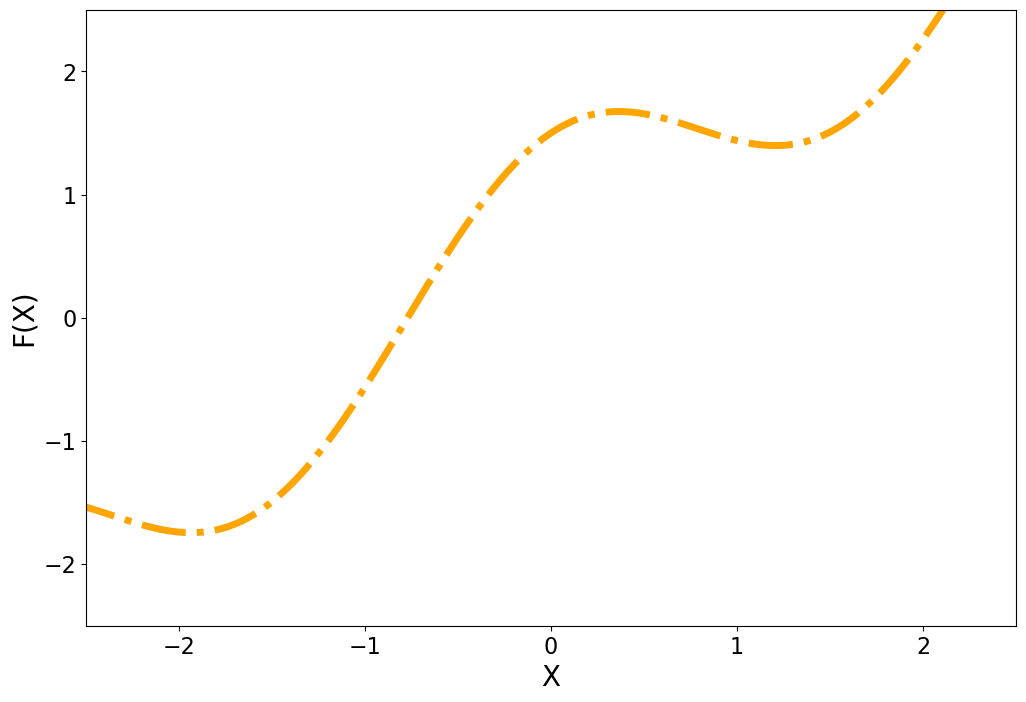

In [77]:
rangeofnumbers=np.linspace(-10,10,1000) #an array of x values where we evaluate the function "func"
plt.plot(rangeofnumbers,func(rangeofnumbers),c='orange',ls='-.',linewidth=5)
#plt.hlines(0,rangeofnumbers[0],np.max(rangeofnumbers),linestyles='-.')
plt.xlabel('X',fontsize=20)
plt.ylabel('F(X)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)

plt.show()

Here, we see that x=1.206 corresponds to a _local minimum_ of f(x) but not a zero.  That is, the LM algorithm is very good at finding minima of functions.  But if you give it an initial guess too far from the right answer, the solution is likely to be faulty.

Now, what about if we use the "hybrid Powell's method" instead?  We get the 'right' answer:

In [78]:
func=lambda x: x+1.5*np.cos(x)**2.
sol2=optimize.root(func,0.4,method='hybr')
print(sol2.x)
#array([-0.77123776])

func(sol2.x)
#array([1.11022302e-16])

[-0.77123776]


array([1.11022302e-16])

The other functions possible with root have varying accuracy.   E.g. "krylov" and "df-sane" do well; "excitingmixing" doesnt'.   Be very careful about what algorithm you use for root finding!

#### _A Short Tangent on Tolerancing_
 
 For simple functions such as $f(x) = x^{2} -9$, the roots are clearly 3 and −3 as we can determine analytically. However, for other functions determining an analytic, or exact, solution for the roots of functions can be difficult.  Here's one particularly evil function, $f(x) = x^{3} +x^{2}cos(x)$, written as: 

In [79]:
func=lambda x: x**(3.)+1e-3*x**(2.)*np.cos(x+0.01)



If we plot this function over the interval x = -10 to 10 we get:

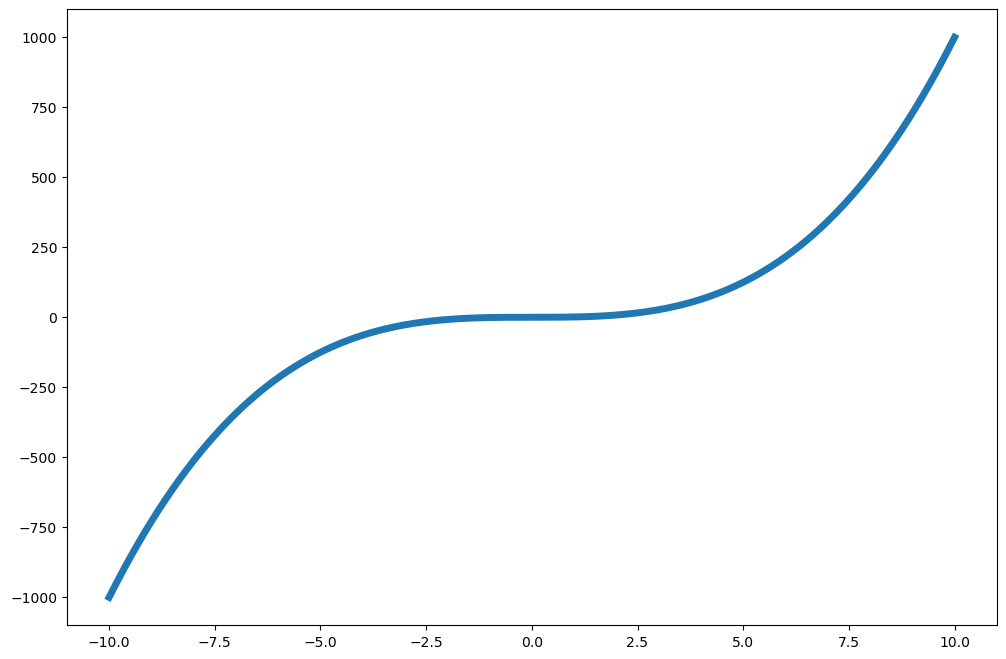

In [80]:
rangeofnumbers=np.linspace(-10,10,1000) #an array of x values where we evaluate the function "func"
plt.plot(rangeofnumbers,func(rangeofnumbers),linewidth=5)
plt.show()

There's a lot of space (x = -7.5 to 2.5) where we are ever so close to finding a root ... but not quite there.

Now, consider also the function $f(x) = 1/x$.  This one does _not_ have a root.  If you let SciPy choose the tolerance level you will get an error the first time:

In [81]:
 func=lambda x: 1/x
 result=optimize.fsolve(func,-5,xtol=1e-8)
 #RuntimeWarning: The number of calls to function has reached maxfev = 400.
 # warnings.warn(msg, RuntimeWarning)

/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_76123/346164032.py:2: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  result=optimize.fsolve(func,-5,xtol=1e-8)


Now, if you run it again, you might not get an error message and might not have any idea that you have a convergence error.

To check for these things turn on ``full_output``

In [82]:
result=optimize.fsolve(func,-5,xtol=1e-8,full_output=True)
print(result)

(array([-8.80118398e+83]), {'nfev': 400, 'fjac': array([[-1.]]), 'r': array([5.46865746e-168]), 'qtf': array([1.83842764e-84]), 'fvec': array([-1.13621077e-84])}, 2, 'The number of calls to function has reached maxfev = 400.')


This is a somewhat trivial example, but you will likely encounter numerical problems in your research where you need a "good enough" solution.  That's where tolerancing comes in.

For computing roots, we want an 𝑥𝑟 such that $𝑓(𝑥𝑟)$ is very close to 0. Therefore |𝑓(𝑥)| is a possible choice for the measure of error since the smaller it is, the likelier we are to a root. Also if we assume that 𝑥𝑖 is the 𝑖th guess of an algorithm for finding a root, then |𝑥𝑖+1−𝑥𝑖| is another possible choice for measuring error, since we expect the improvements between subsequent guesses to diminish as it approaches a solution. As will be demonstrated in the following examples, these different choices have their advantages and disadvantages.

E.g. Let error be measured by 𝑒=|𝑓(𝑥)| and tol be the acceptable level of error. The function $𝑓(𝑥)$=𝑥$^{2}$+tol/2 has no real roots. However, |𝑓(0)|=tol/2 and is therefore acceptable as a solution for a root finding program.

Another general example: Let error be measured by 𝑒=|𝑥𝑖+1−𝑥𝑖| and tol be the acceptable level of error. The function $𝑓(𝑥)=1/𝑥$ has no real roots as we found before.  But the guesses 𝑥𝑖= −tol/4 and 𝑥𝑖+1=tol/4 have an error of 𝑒=tol/2 and is an acceptable solution for a computer program.

The use of tolerance and converging criteria must be done very carefully and in the context of the program that uses them.

### 2. Finding Minima

Many of the algorithms used for root finding are also useful for finding minima of functions.  E.g. the Levenberg-Marquardt algorithm is used to find minima.   See the ``scipy.optimize.minimize`` documentation for the full list of algorithms at your disposal.

Here, we discuss in a bit more detail the Nelder-Mead algorithm, also known as the "Amoeba" or "downhill simplex" algorithm.  This algorithm has a long history (I encountered it eons ago in the standard text "Numerical Recipes").  Its wide use warrants more detailed discussion.

##### _Nelder-Mead Simplex Algorithm (aka "Amoeba" Algorithm)_

The simplex algorithm is probably the simplest way to minimize a fairly well-behaved function.  It is a direct search method (based on function comparison) and is often applied to nonlinear optimization problems for which derivatives may not be known.  It requires only function evaluations and is a good choice for simple minimization problems. However, because it does not use any gradient evaluations, it may take longer to find the minimum.

The algorithm leverages on the concept of a "simplex" which is basically jargon for "triangle in an arbitrary number of dimensions" (e.g. a true triangle in a plane; a tetrahedron in 3-D space).   In $n$ dimensions, the simplex algorithm requires $n+1$ test points.   The simplest approach is to replace the worst point with a point reflected through the centroid of the remaining n points. If this point is better than the best current point, then we can try stretching exponentially out along this line.   If you model the behavior of the simplex through n-dimensional space over time, it takes on the appearance of an amoeba propagating through a region of space.  Hence the nickname.

Here's a really simple 1-D example of its implementation of the function $f(x) = 2x^{2}-0.5x + 0.25*cos(\pi x^{2})$, where we choose several starting points

In [37]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

func= lambda x: 2*x**2-0.5*x+0.25*np.cos(x*2*np.pi)

xstart=-1

result=optimize.minimize(func,xstart,method="nelder-mead")
print(result.x) #the estimated minimum
#[0.38486328]

xstart=-5
result=optimize.minimize(func,xstart,method="nelder-mead")
print(result.x) #the estimated minimum
#[0.3848877]

xstart=2
result=optimize.minimize(func,xstart,method="nelder-mead")
print(result.x) #the estimated minimum
#[0.38486328]

[0.38486328]
[0.3848877]
[0.38486328]


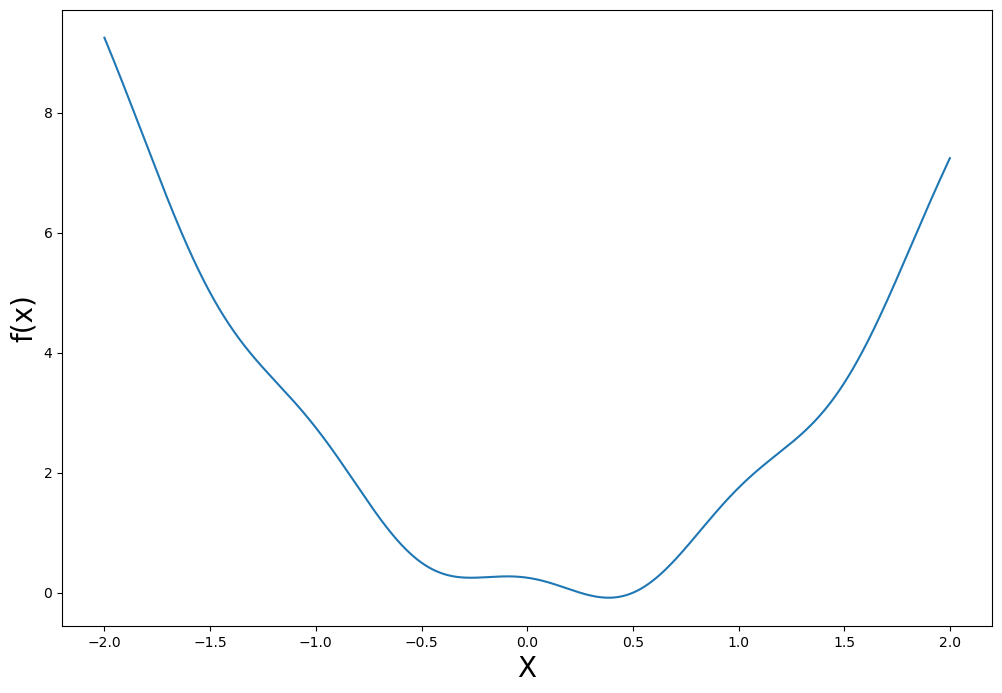

In [38]:
#to visually confirm ...

xrange=np.arange(-2,2,0.001)
plt.plot(xrange,func(xrange))
plt.xlabel('X',fontsize=20)
plt.ylabel('f(x)',fontsize=20)
plt.show()

It appears as if the N-M algorithm has found the minimum of the function and avoided another local minimum at about -0.4 in the process.  

Here's a more complex two-dimensional implementation, $f(x) = sin(x_{1})e^{1-cos{(x_{o})^{2}}} + cos(x_{o})e^{1-sin{(x_{o})^{2}}} + (x_{o}-x_{1})^{2}$:

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

#function
#def f(x):
# out=np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2
# return out
f = lambda x: np.sin(x[1])*np.exp(1-np.cos(x[0]))**2+np.cos(x[0])*np.exp(1-np.sin(x[1]))**2+(x[0]-x[1])**2

We can do a contour plot of this function(x,y).  You will immediately see the challenges with the N-D in this case.

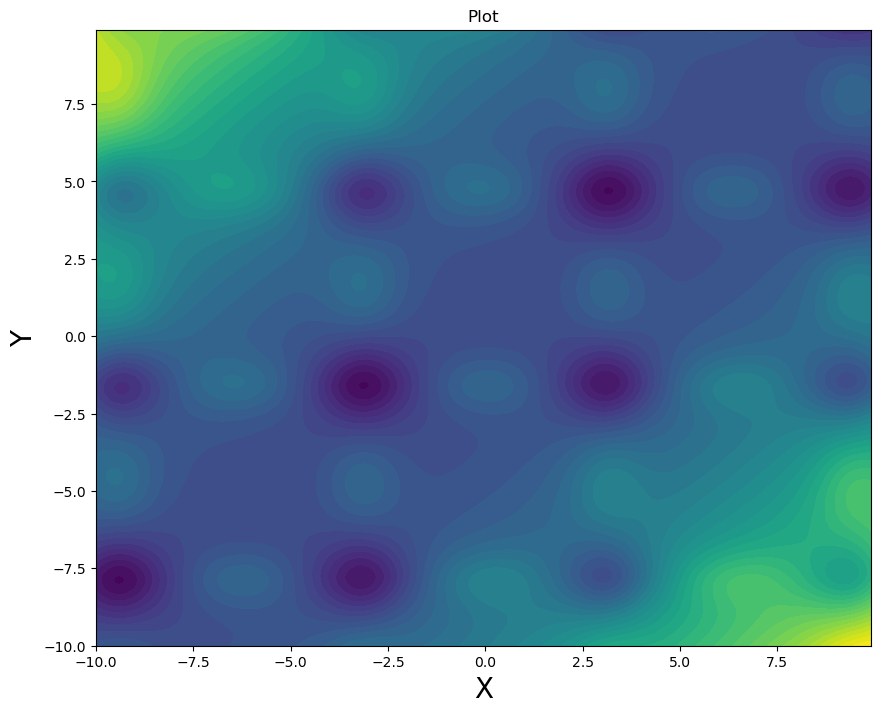

In [40]:
delta=0.1
x = np.arange(-10,10, delta)
y = np.arange(-10,10, delta)
X, Y = np.meshgrid(x, y)
Z=f([X,Y])
fig, ax = plt.subplots(figsize=(10, 8))
CS = ax.contourf(X, Y, Z, 50) #filled contour plot
ax.set_title('Plot')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
plt.show()

 There are multiple local minima within the space of the graph and it is very easy for N-D to get stuck in one.  
 
The starting assumptions significantly affect the computed minimum.  E.g.


In [41]:
#first guess
result=optimize.minimize(f,[5,2.5],method='nelder-mead')
print('first guess ',result)
#final_simplex: (array([[3.16033818, 4.69362966],
#       [3.16031092, 4.69362937],
#       [3.16030507, 4.69369765]]), array([-106.78773361, -106.78773361, -106.78773351]))
#           fun: -106.78773361168493
#       message: 'Optimization terminated successfully.'
#          nfev: 84
#           nit: 45
#        status: 0
#       success: True
#             x: array([3.16033818, 4.69362966])

print('value at minima {0:.5f}'.format(f(result.x)))

first guess         message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -106.78773361168493
             x: [ 3.160e+00  4.694e+00]
           nit: 45
          nfev: 84
 final_simplex: (array([[ 3.160e+00,  4.694e+00],
                       [ 3.160e+00,  4.694e+00],
                       [ 3.160e+00,  4.694e+00]]), array([-1.068e+02, -1.068e+02, -1.068e+02]))
value at minima -106.78773


In [42]:
#second guess
result=optimize.minimize(f,[5,5],method='nelder-mead')
#same result

print('second guess',result)
print('value at minima {0:.5f}'.format(f(result.x)))

second guess        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -106.787733502921
             x: [ 3.160e+00  4.694e+00]
           nit: 39
          nfev: 73
 final_simplex: (array([[ 3.160e+00,  4.694e+00],
                       [ 3.160e+00,  4.694e+00],
                       [ 3.160e+00,  4.694e+00]]), array([-1.068e+02, -1.068e+02, -1.068e+02]))
value at minima -106.78773


In [44]:
      
#third guess

result=optimize.minimize(f,[-5,3],method='nelder-mead')

print('third guess ',result)
print('value at minima {0:.5f}'.format(f(result.x)))

third guess         message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -48.99140282891358
             x: [-3.047e+00  4.617e+00]
           nit: 44
          nfev: 84
 final_simplex: (array([[-3.047e+00,  4.617e+00],
                       [-3.047e+00,  4.618e+00],
                       [-3.047e+00,  4.618e+00]]), array([-4.899e+01, -4.899e+01, -4.899e+01]))
value at minima -48.99140


In [45]:
#fourth guess           
result=optimize.minimize(f,[-1.25,2.5],method='nelder-mead')
print('fourth guess ',result)
#final_simplex: (array([[0.65062186, 0.9201995 ],
 #      [0.65069767, 0.92011556],
 #      [0.65063794, 0.92023084]]), array([2.46724066, 2.46724066, 2.46724066]))
 #          fun: 2.4672406559318256
 #      message: 'Optimization terminated successfully.'
 #         nfev: 91
 #          nit: 47
 #       status: 0
 #      success: True
 #            x: array([0.65062186, 0.9201995 ])
print('value at minima {0:.5f}'.format(f(result.x)))

fourth guess         message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.467240655931825
             x: [ 6.506e-01  9.202e-01]
           nit: 47
          nfev: 91
 final_simplex: (array([[ 6.506e-01,  9.202e-01],
                       [ 6.507e-01,  9.201e-01],
                       [ 6.506e-01,  9.202e-01]]), array([ 2.467e+00,  2.467e+00,  2.467e+00]))
value at minima 2.46724


In [46]:
#fifth guess
result=optimize.minimize(f,[-2.5,-2.5],method='nelder-mead')
print('fifth guess ',result)
#final_simplex: (array([[-3.12288422, -1.58956166],
 #      [-3.12281825, -1.58950298],
 #      [-3.12284585, -1.58947105]]), array([-106.78773355, -106.78773349, -106.78773339]))
 #          fun: -106.78773355031949
 #      message: 'Optimization terminated successfully.'
 #         nfev: 68
 #          nit: 35
 #       status: 0
 #      success: True
 #            x: array([-3.12288422, -1.58956166]) 
print('value at minima {0:.5f}'.format(f(result.x)))

fifth guess         message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -106.78773355031949
             x: [-3.123e+00 -1.590e+00]
           nit: 35
          nfev: 68
 final_simplex: (array([[-3.123e+00, -1.590e+00],
                       [-3.123e+00, -1.590e+00],
                       [-3.123e+00, -1.589e+00]]), array([-1.068e+02, -1.068e+02, -1.068e+02]))
value at minima -106.78773


There are two minima of the same value here (at about 3.16,4.69 and -3.12, -1.59).  The other are local minima but have larger values of f.
  The basic point is that N-D can easily get trapped in local minima or generally 'poor' solutions. 
  

Here's another example of a so-called "multi-modal" problem:

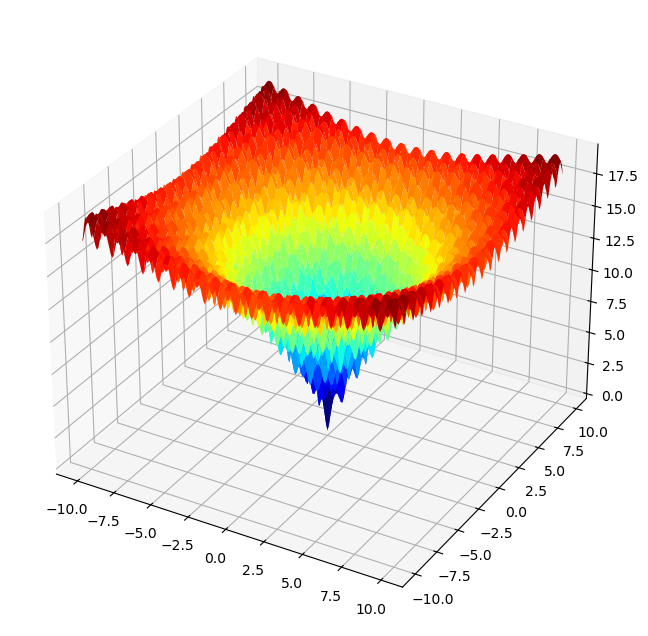

In [47]:
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib inline
#  function
def function(x,y):

 return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
 
# define range for input
r_min, r_max = -10.0, 10.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = np.meshgrid(xaxis, yaxis)
# compute targets
results = function(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
axis = figure.add_subplot(projection = '3d')
axis.plot_surface(x, y, results, cmap='jet')

plt.show()

0.0


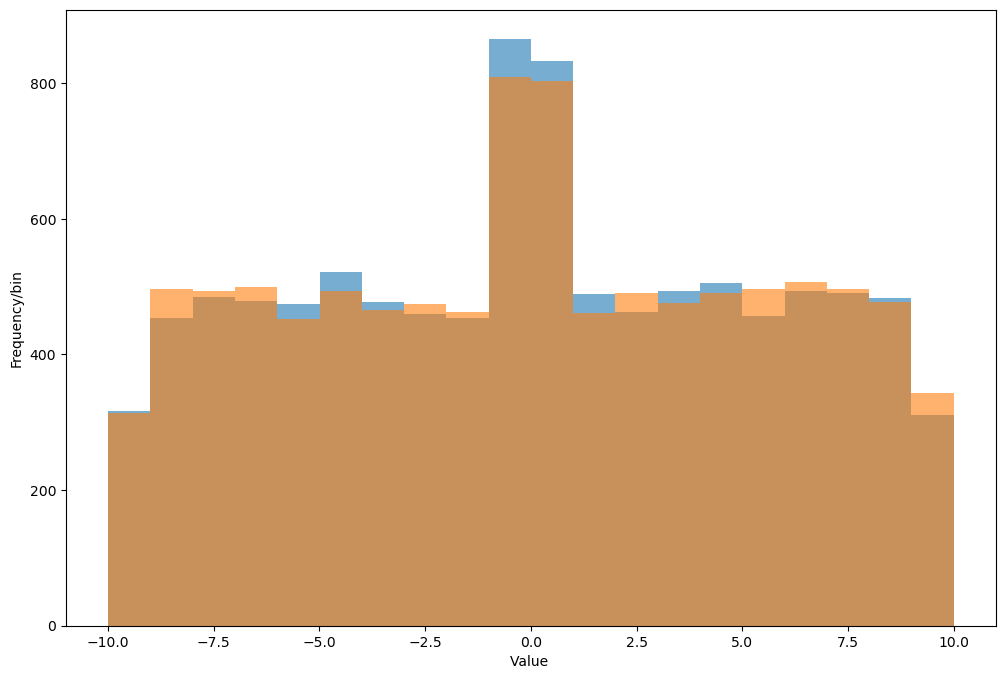

In [48]:
#Now, we run the Nelder-Mead algorithm ...

def td_function(z):

 x,y=z
 return -20.0 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + np.e + 20
    
# define range for input
r_min, r_max = -10.0, 10.0

# perform the search

solutions_x=[]
solutions_y=[]
ntrial=10000

for i in range(ntrial):

 # define the starting point as a random sample from the domain
 spt = r_min + np.random.rand(2) * (r_max - r_min)
 #print('spt is ',spt)
 result = optimize.minimize(td_function, spt, method='nelder-mead')
# summarize the result
 #print('Status : %s' % result['message'])
 #print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
 solution = result['x']
 evaluation = td_function(solution)
# print('Solution: f(%s) = %.5f' % (solution, evaluation))

 solutions_x.append(solution[0])
 solutions_y.append(solution[1])


print(td_function([0,0]))

plt.hist(np.array(solutions_x),bins=20,alpha=0.6)
plt.hist(np.array(solutions_y),bins=20,alpha=0.6)
plt.xlabel('Value ')
plt.ylabel('Frequency/bin')
plt.show()

Here's another example, where you have "noisy" data.

In [49]:

def noisyfunction(x):
 fval=(x + np.random.randn(len(x))*0.4)**2.0
 return fval
    

In [52]:
# nelder-mead optimization of noisy one-dimensional convex function


# define range for input
r_min, r_max = -10.0, 10.0
# define the starting point as a random sample from the domain
spt = r_min + np.random.rand(1) * (r_max - r_min)
# perform the search
result = optimize.minimize(noisyfunction, spt, method='nelder-mead')
# summarize the result
#print('Status : %s' % result['message'])
print('Status : {0:s}'.format(result['message']))
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = noisyfunction(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Maximum number of function evaluations has been exceeded.
Total Evaluations: 200
Solution: f([4.01332038]) = 10.45898


/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_78192/2322140074.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Solution: f(%s) = %.5f' % (solution, evaluation))


### 3. Curve Fitting (with SciPy *and* NumPy)

The SciPy provides a ``curve_fit`` function in its optimization library to fit the data with a given function. This method applies non-linear least squares to fit the data and extract the optimal parameters out of it. 

 NumPy also provides fitting capabilities through the ``np.polyfit`` function (I'm more familiar with this) and ``np.polynomial`` function (newer version, which is 'preferred' but I don't like it).  

The major difference between these two is that ``curve_fit`` requires you to supply a functional fit; ``np.polyfit`` is just that (a polynomial of some specified degree where you solve for the coefficients).  In this sense, I guess that ``curve_fit`` is more powerful.  


We will demonstrate a simple polynomial fit to data using both libraries then a more complex one fitting a functional form with SciPy.

First, the simple case

[1.04257491 0.0771206 ]
[1.04257491 0.0771206 ]


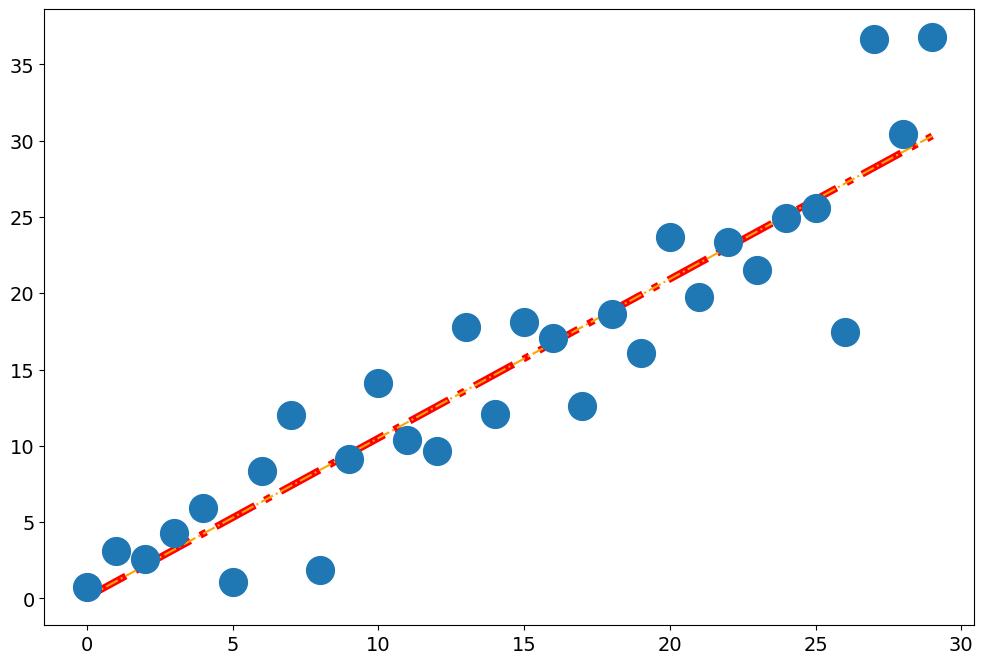

In [63]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

xarray=np.arange(30)
yarray=np.arange(30)+3*np.random.randn(30) 

#numpy
result=np.polyfit(xarray,yarray,1)
print(result)


#scipy
def func(x,a,b):
 return a*x+b

param, param_cov = curve_fit(func, xarray, yarray)
print(param)


#the fit with SciPy
plt.plot(xarray,func(xarray,param[0],param[1]),'-.',color='red',linewidth=5) 
#or with NumPy
plt.plot(xarray,result[0]*xarray+result[1],'-.',color='orange') #basically the same as SciPy
plt.plot(xarray, yarray, 'o', color ='tab:blue',markersize=20) #the data
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Obviously, we just had a simple linear plot with some noise added and not surprisingly that is what both NumPy and SciPy found.

Here's one that is more complex, and where we need SciPy to do the work  


[2.601634   3.83995969]


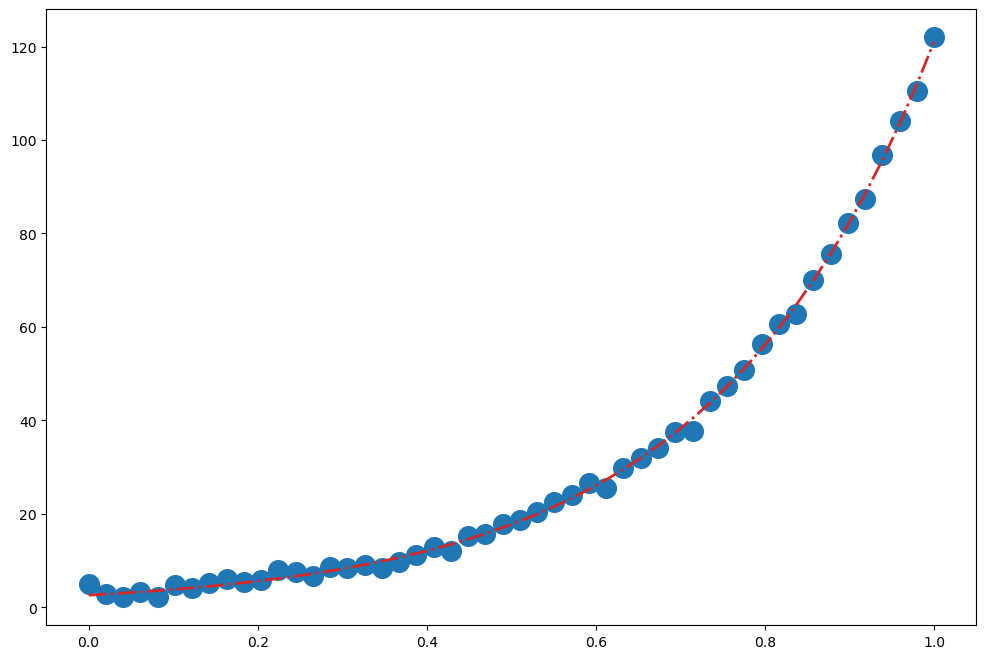

In [64]:
#generate fake data
xarray = np.linspace(0, 1, num = 50)
yarray = 2.7 * np.exp(3.8 * xarray) + np.random.normal(size = 50) #some exponential with noise

def test(xarray, a, b):
    return a*np.exp(b*xarray)

param,param_cov = curve_fit(test,xarray,yarray)

print(param)

plt.plot(xarray,test(xarray,param[0],param[1]),'-.',color='tab:red',linewidth=2)
plt.scatter(xarray,yarray,s=200)
plt.show()

Note here that the assumed functional form is key.  For example, if you are going to model your data as a simple cosine function then the function you port into ``curve_fit`` should look like:

```
def test(xarray, a, b):
    return a*np.cos(b*x) 
```